<a href="https://colab.research.google.com/github/leidysguerrero120/TrabajoAnalitica-Salud/blob/main/Preprocesamiento_y_Limpieza_de_Datos_TM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analítica III - Caso de Estudio Salud**
Leidys Guerrero Lobo. Leidys.guerrero@udea.edu.co
Paola Andrea Arabia Álvarez. Paola.arabia@udea.edu.co
Mateo Caicedo Aguirre. mateo.caicedo@udea.edu.co

Clasificación de Tumores de Mama Utilizando Analítica Predictiva

Base de datos: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

1.	Descripción del Problema
a)	Contexto del Cáncer de Mama
El cáncer de mama es el tipo de cáncer más común en mujeres a nivel mundial, representando un problema de salud pública significativo. Las estadísticas muestran que una de cada ocho mujeres en el mundo puede desarrollar cáncer de mama en algún momento de su vida, y, aunque los avances en medicina han mejorado los tratamientos, el pronóstico de la enfermedad depende en gran medida de su detección temprana. Identificar los tumores como benignos o malignos lo antes posible es crucial, ya que permite a los médicos planificar tratamientos adecuados y a los pacientes aumentar sus probabilidades de recuperación y supervivencia.

b)	Problema de Diagnóstico en el Ámbito Clínico
El proceso de diagnóstico tradicional de cáncer de mama incluye varios procedimientos clínicos, como mamografías, biopsias y análisis citológicos de células. Estos métodos pueden ser costosos, invasivos y, en ocasiones, demorados. Además, la interpretación de los resultados puede estar sujeta a variabilidad entre especialistas, lo que aumenta el riesgo de errores de diagnóstico. Un diagnóstico erróneo, ya sea un falso positivo (diagnosticar como maligno un tumor benigno) o un falso negativo (diagnosticar como benigno un tumor maligno), puede tener consecuencias significativas en términos de salud, costo, tiempo y angustia para el paciente.

c)	Necesidad de un Enfoque Basado en Analítica Predictiva
La introducción de técnicas de aprendizaje automático en el diagnóstico de cáncer de mama ofrece una solución potencial a estos problemas, ya que permite analizar grandes volúmenes de datos de manera rápida y con alta precisión. Los algoritmos de clasificación pueden identificar patrones en características celulares que están asociados con tumores benignos o malignos, brindando soporte a los médicos en sus decisiones. La implementación de un modelo predictivo puede ayudar a automatizar parte del proceso diagnóstico, reduciendo la carga de trabajo de los especialistas y mejorando la eficiencia y precisión del diagnóstico.

2.	Diseño de la Solución

a)	Propuesta de Solución
Crear un modelo de aprendizaje automático que clasifique los tumores mamarios en benignos o malignos, basado en las características morfológicas de las células.


In [ ]:
#Importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from google.colab import drive

#Montar Google Drive
drive.mount('/content/drive')

#Cargar el conjunto de datos
file_path = '/content/drive/MyDrive/Tumores de Mama.xlsx'
data = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Descripción inicial de los datos
print("Descripción inicial de los datos:")
print(data.info())
print(data.describe())


Descripción inicial de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569

En este análisis inicial de los datos, observamos que el conjunto tiene 569 registros y 32 columnas, donde cada columna representa características morfológicas de las células en diferentes momentos de cálculo (1, 2 y 3), incluyendo métricas como el radio, textura, perímetro, área, suavidad y simetría, entre otros. La columna 'Diagnosis' indica el tipo de tumor (benigno o maligno), mientras que el resto de las variables son numéricas y continúan sin valores nulos. En el resumen estadístico, notamos que existe una variabilidad considerable entre las características, especialmente en el radio y perímetro, lo cual puede indicar su potencial relevancia en la clasificación. Esta información preliminar nos da una visión clara del estado del conjunto de datos y resalta la necesidad de un análisis exploratorio para identificar patrones y ajustar los datos en función de su rango y distribución.

In [ ]:
#Limpiar los datos
data_cleaned = data.drop(columns=['ID'])
data_cleaned['Diagnosis'] = data_cleaned['Diagnosis'].map({'B': 0, 'M': 1})


In [ ]:
#Verificar valores nulos
print("Valores nulos en cada columna:")
print(data_cleaned.isnull().sum())

#Normalizar características
features_to_normalize = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1']
data_cleaned[features_to_normalize] = (data_cleaned[features_to_normalize] - data_cleaned[features_to_normalize].min()) / (data_cleaned[features_to_normalize].max() - data_cleaned[features_to_normalize].min())


Valores nulos en cada columna:
Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64


Este análisis de limpieza y normalización del conjunto de datos muestra varios avances clave. Primero, eliminamos la columna 'ID', que no es relevante para el análisis y la clasificación, ya que no aporta información útil sobre el diagnóstico. Además, la columna 'Diagnosis' fue convertida a un formato binario, donde 'B' (benigno) se mapea a 0 y 'M' (maligno) a 1, facilitando el uso en algoritmos de clasificación.

Al verificar los valores nulos, confirmamos que no existen valores faltantes en ninguna columna, lo cual simplifica el preprocesamiento y evita la necesidad de imputaciones o eliminaciones adicionales. Posteriormente, normalizamos algunas de las características seleccionadas ('radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1') para que sus valores estén dentro del rango de 0 a 1, lo que ayuda a que los modelos de clasificación que se aplicarán más adelante procesen las características en escalas comparables, mejorando la precisión y estabilidad de los resultados. Este proceso de limpieza y transformación establece una base sólida para el análisis y la modelación, garantizando que los datos estén en un formato adecuado y optimizado para la siguiente fase de entrenamiento.

In [ ]:
#Descripción después de limpiar y procesar
print("Descripción después de limpiar y procesar los datos:")
print(data_cleaned.describe())


Descripción después de limpiar y procesar los datos:
        Diagnosis     radius1    texture1  perimeter1       area1  \
count  569.000000  569.000000  569.000000  569.000000  569.000000   
mean     0.372583    0.070634    0.323965    0.332935    0.216920   
std      0.483918    0.245572    0.145453    0.167915    0.149274   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000450    0.218465    0.216847    0.117413   
50%      0.000000    0.000615    0.308759    0.293345    0.172895   
75%      1.000000    0.001002    0.408860    0.416765    0.271135   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       smoothness1  compactness1  concavity1  concave_points1   symmetry1  \
count   569.000000    569.000000  569.000000       569.000000  569.000000   
mean      0.394785      0.104341    0.088799         0.048919    0.181162   
std       0.126967      0.052813    0.079720         0.038803    0.027414   
min       0.00000

La descripción estadística del conjunto de datos después de su limpieza y normalización resalta que la variable de diagnóstico tiene un 37.2% de casos malignos, mientras que el 62.8% son benignos. Las características normalizadas como radius1, texture1, perimeter1, area1 y smoothness1 ahora están entre 0 y 1, concentrándose en valores más bajos, lo que es común en datos médicos al reflejar una mayoría de casos en rangos menos extremos. Las otras características (radius3, texture3, perimeter3, etc.) mantienen su rango original, y algunas presentan valores muy altos de dispersión, como concavity3 y compactness3, indicando una posible variabilidad o presencia de valores atípicos. Estos patrones estadísticos, con medias y medianas cercanas en la mayoría de las variables, sugieren distribuciones en su mayoría centradas, aunque algunas características requieren mayor revisión para ajustar posibles puntos atípicos antes de iniciar el modelado.

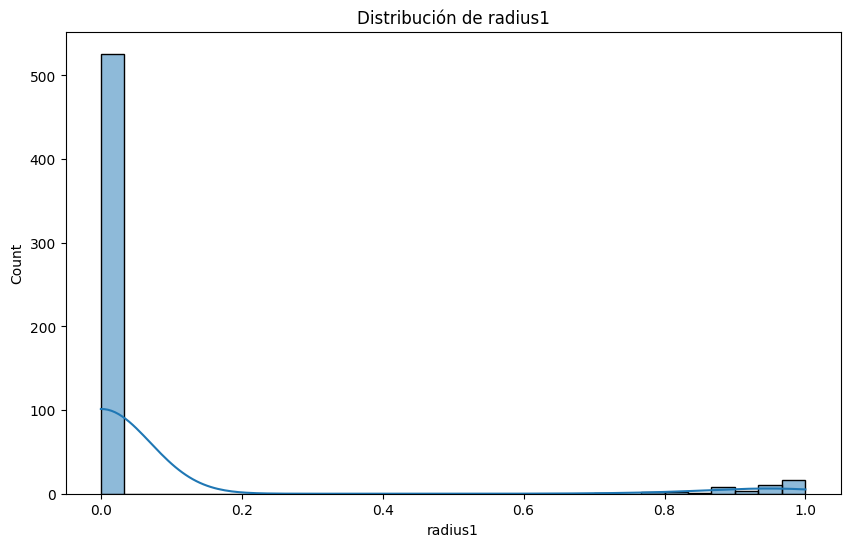

In [ ]:
#Visualización
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['radius1'], bins=30, kde=True)
plt.title('Distribución de radius1')
plt.show()


Esta gráfica muestra la distribución de la variable radius1.

Al analizar la forma de la distribución, observamos que la mayoría de los valores se encuentran concentrados alrededor de 0, con una gran cantidad de datos en ese rango. A medida que avanzamos hacia valores mayores de radius1, la frecuencia disminuye drásticamente, presentando una cola larga hacia la derecha. Este tipo de distribución es común en variables con sesgo positivo, donde los valores tienden a estar concentrados en un rango bajo y solo unos pocos alcanzan valores altos.

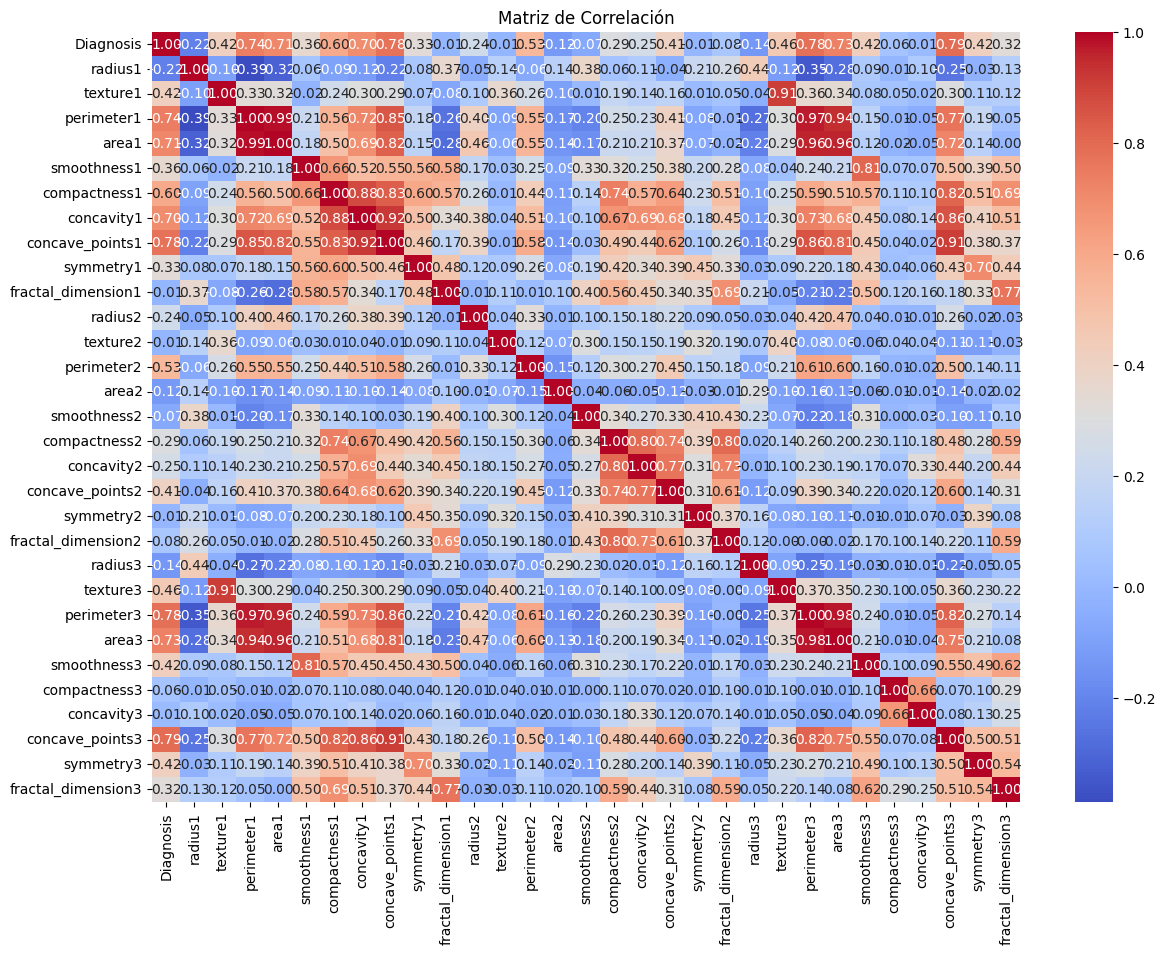

In [ ]:
#Matriz de correlación
plt.figure(figsize=(14, 10))
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

La matriz de correlación muestra que Diagnosis está altamente correlacionada con variables como radius1, perimeter1, area1, compactness1, concavity1, y concave_points1, lo que sugiere que estas características pueden ser claves para predecir o entender el diagnóstico. Además, se observan fuertes correlaciones entre diferentes versiones de las mismas variables (como radius1, radius2, y radius3), lo que indica redundancia en el conjunto de datos. Reducir estas variables correlacionadas podría simplificar el análisis sin perder información importante, optimizando así el rendimiento de cualquier modelo predictivo que se construya en base a estos datos.

In [ ]:
#Guardar el conjunto de datos limpio
data_cleaned.to_csv('/content/drive/MyDrive/Tumores_de_Mama_Cleaned.csv', index=False)